# 1. Data representation

### 1.1 Data representation using numpy

1. scikit-learn dataset 중 붓꽃(petal) 데이터 $x_{2}$(petal width)에 대한 벡터 변수 x2 를 만들기

In [7]:
from sklearn.datasets import load_iris

In [36]:
# 데이터 추출

data = load_iris()
data.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [64]:
# print(data.DESCR)

In [68]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [63]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [77]:
# 붓꽃 데이터 파악을 위한 임시적인 데이터프레임 생성
_ = pd.DataFrame(data.data,columns=data.feature_names)
_

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
# 데이터의 기초통계량 확인

_.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
# 데이터의 기초통계량 확인 (왜도)
# 확인 결과 : 심하진 않지만, 우측으로 비대칭임을 확인할 수 있음

_['petal width (cm)'].skew()

-0.10296674764898116

In [46]:
# 데이터의 기초통계량 확인 (첨도)
# 확인 결과 : 심하진 않지만, 정규분포 보다 모멘트 중심으로 쏠려있는 것을 확인

_['petal width (cm)'].kurtosis()

-1.340603996612646

In [37]:
# 특징 벡터로 변환하기 위한 reshape 진행

x2 = data.data[:,3]
x2 = x2.reshape(-1,150)
x2.shape

(1, 150)

In [39]:
# histogram 시각화를 위한 Series로 저장(because : 기존의 2차원 이상의 array데이터는 plt.hist()로 시각화 불가능)

x2_series = pd.Series(x2[0])
x2_series

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

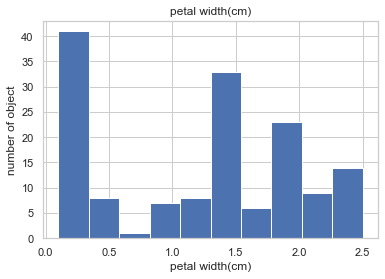

In [40]:
# histogram으로 데이터 시각화

%matplotlib inline
plt.hist(x2_series)
plt.title('petal width(cm)')
plt.xlabel('petal width(cm)')
plt.ylabel('number of object')
plt.show()

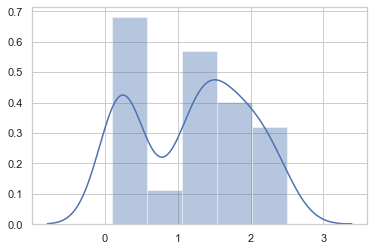

In [48]:
# kernel distritubion 시각화

sns.distplot(x2_series)

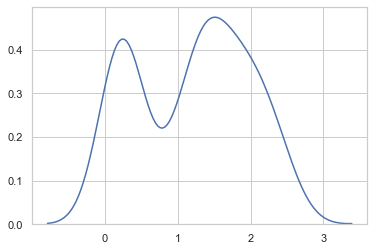

In [49]:
sns.kdeplot(x2_series)

In [79]:
# iris 데이터 전체 분포 확인

# species 데이터 추가 위한 전처리
# 1. series로 species 실수형 데이터 가져오기 (category 타입)
# 2. 실수 category -> 문자 category로 변환 ( .cat.rename_catories([ ]))

species = pd.Series(data.target, dtype='category')
species = species.cat.rename_categories(data.target_names)
species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [80]:
# species 데이터 추가

_['species'] = species
_

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


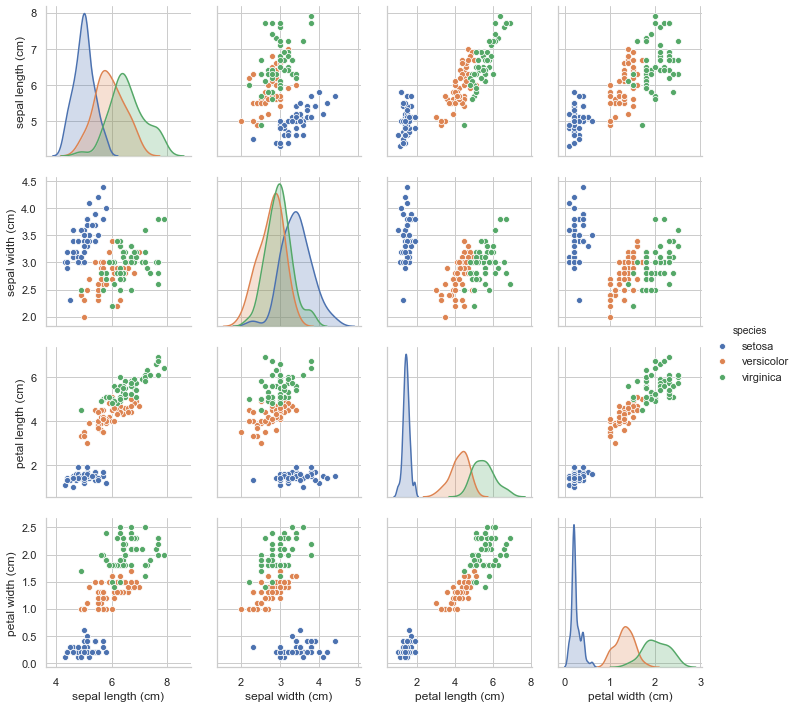

In [82]:
sns.pairplot(_,hue = 'species')

2. MNIST digit images(숫자 이미지) 추출 및 특징벡터화 작업

    - 본래 2차원 이미지 데이터(8 by 8)를 1차원 특징벡터화(64 by 1)

In [84]:
from sklearn.datasets import load_digits

In [85]:
digit = load_digits()

In [87]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [92]:
digit.data[1].shape

(64,)

In [101]:
# image 데이터 shape 확인 : 8 by 8, 1797개의 이미지

digit.images.shape

(1797, 8, 8)

In [102]:
# 실제 확인 : 8 by 8 이미지 데이터(1개 이미지 당)

digit.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [129]:
# 데이터 reshape 전처리 : 특징벡터 저장 위함
# 'd'라는 리스트 타입에 64,1 이미지 데이터 저장

d = []
for i in range(10):
    d.append(digit.images[i].reshape(64,-1))
len(d[0])

64

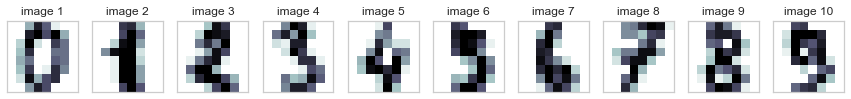

In [121]:
# 8 by 8 이미지 데이터 시각화

plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(digit.images[i],cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i+1))

plt.show()

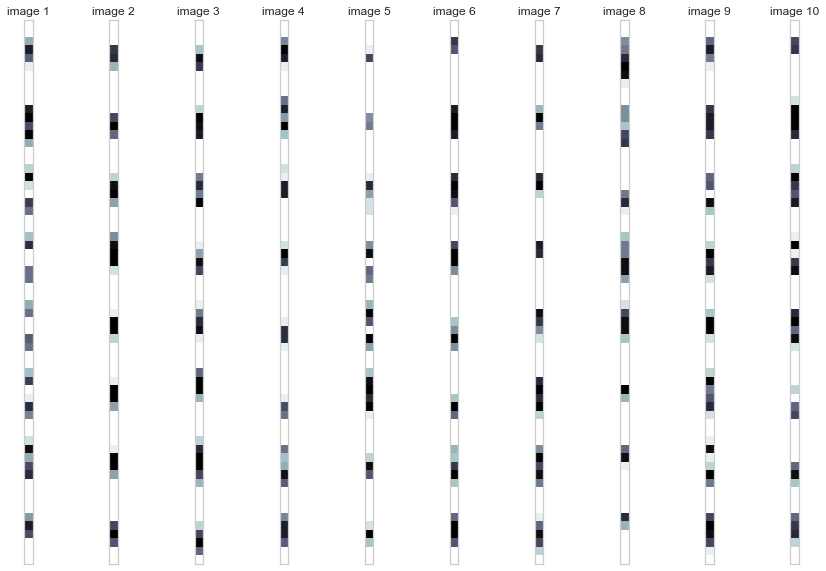

In [122]:
# 64 by 1 특징벡터 시각화

plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(d[i],cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i+1))

plt.show()

3. 3차원 텐서의 이미지 데이터 표현 

    - 2차원 행렬의 이미지 + 컬러 데이터(채널) 추가 = 3차원 데이터

In [130]:
from scipy import misc

In [132]:
img_rgb = misc.face()  # 컬러 이미지 로드
img_rgb.shape  # 데이터의 모양 : 각 이미지 당 3개의 채널(컬러) + 2차원 이미지 데이터(768 by 1024)

(768, 1024, 3)

In [137]:
# 1채널의 이미지 데이터

img_rgb[:,:,0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

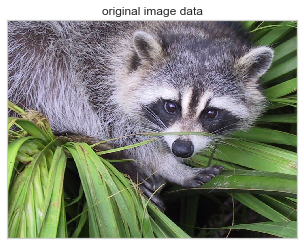

In [157]:
# original 이미지 시각화
plt.figure(figsize=(10,4))
plt.imshow(img_rgb,cmap=plt.cm.gray)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("original image data")
plt.show()

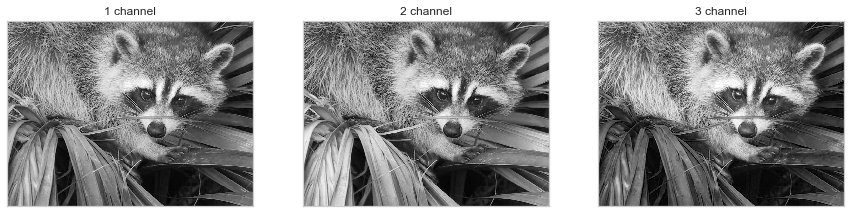

In [158]:
# 각 채널 별(RGB값, 컬러) 이미지 시각화

plt.figure(figsize=(15,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(img_rgb[:,:,i],cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("{} channel".format(i+1))
plt.show()

# 2. Matrix Calculation

```
1. A, B, C 세 회사의 주식은 각각 100만원, 80만원, 50만원이다. 이 주식을 각각 3주, 4주, 5주를 매수할 때 필요한 금액을 구하고자 한다.

(1) 주식의 가격과 수량을 각각  𝑝  벡터,  𝑛  벡터로 표시하고 넘파이로 코딩한다.

(2) 주식을 매수할 때 필요한 금액을 곱셈으로 표시하고 넘파이 연산으로 그 값을 계산한다.
```

In [160]:
# 1.(1) 가격과 수량을 벡터로 표현

p = np.array([100,80,50])
n = np.array([3,4,5])

In [161]:
# 1.(2) 주식 매수 금액을 곱셈으로 표현 + 넘파이 연산으로 매수금액 계산
# 결과 : 총 필요 매수금액 : 870만원

payment = p.T@n
payment

870

2. 벡터  𝑥 의 평균 제거 벡터는 다음과 같이 계산함을 증명하라.

$$ 
\begin{align}
x - \dfrac{1}{N}\mathbf{1}_N^Tx \mathbf{1}^{}_N
\end{align}
$$

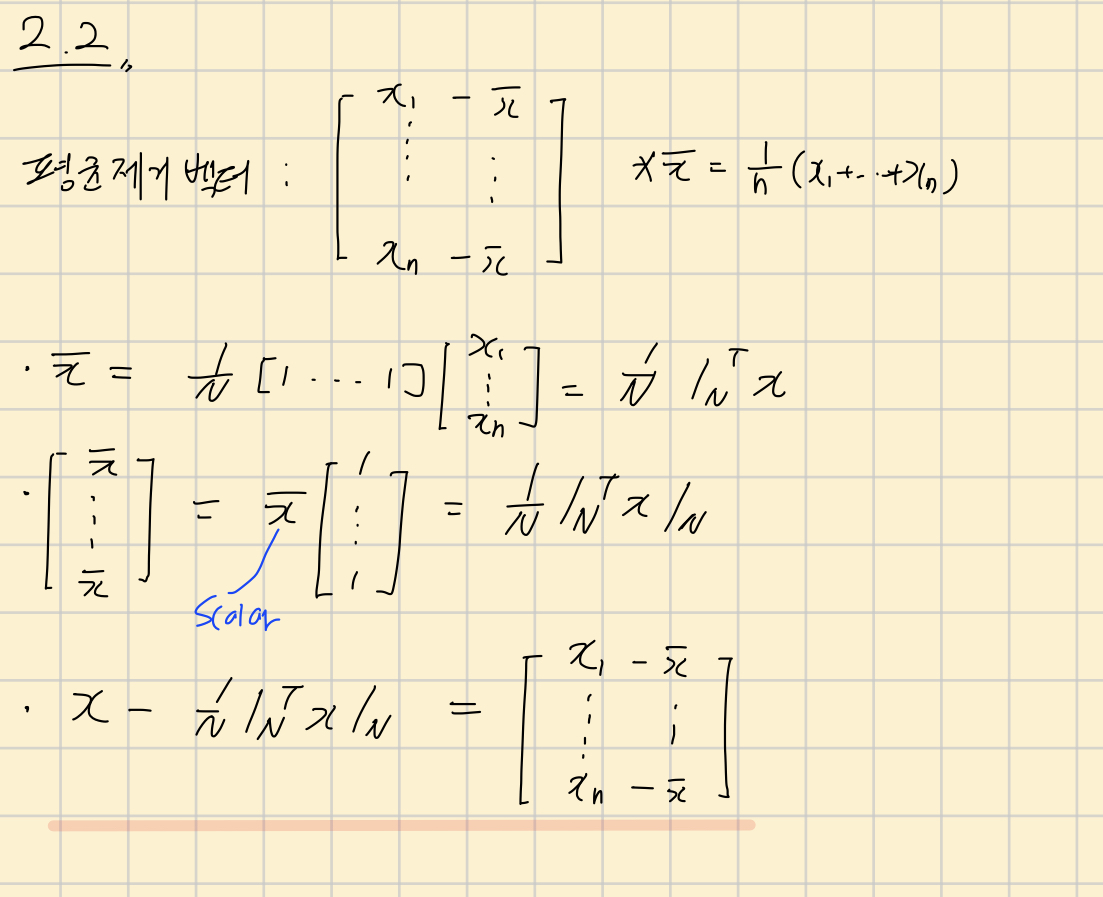

In [166]:
Image('/Users/kimjeongseob/Desktop/Math/2. MML_code/image_김도형 연습문제 풀이/IMG_A8ABD7B550B6-1.jpeg')

3. 다음 코드를 실행하면 MNIST 숫자 이미지 전체 데이터를 모두 벡터로 변환하여 하나의 넘파이 행렬 `X`를 만든다.
이 행렬을 이용하여 다음 문제를 풀어라.
```
from sklearn.datasets import load_digits
X = load_digits().data
```

(1) 내적을 이용하여 첫 번째 이미지와 10번째 이미지의 유사도를 구하라.

(2) 내적을 이용하여 모든 이미지의 조합에 대해 유사도를 구하라. 어떻게 구현하는 것이 효율적일까? (힌트 : 이 문제는 뒤에서 배울 행렬과 행렬의 곱셈을 이용한다.)

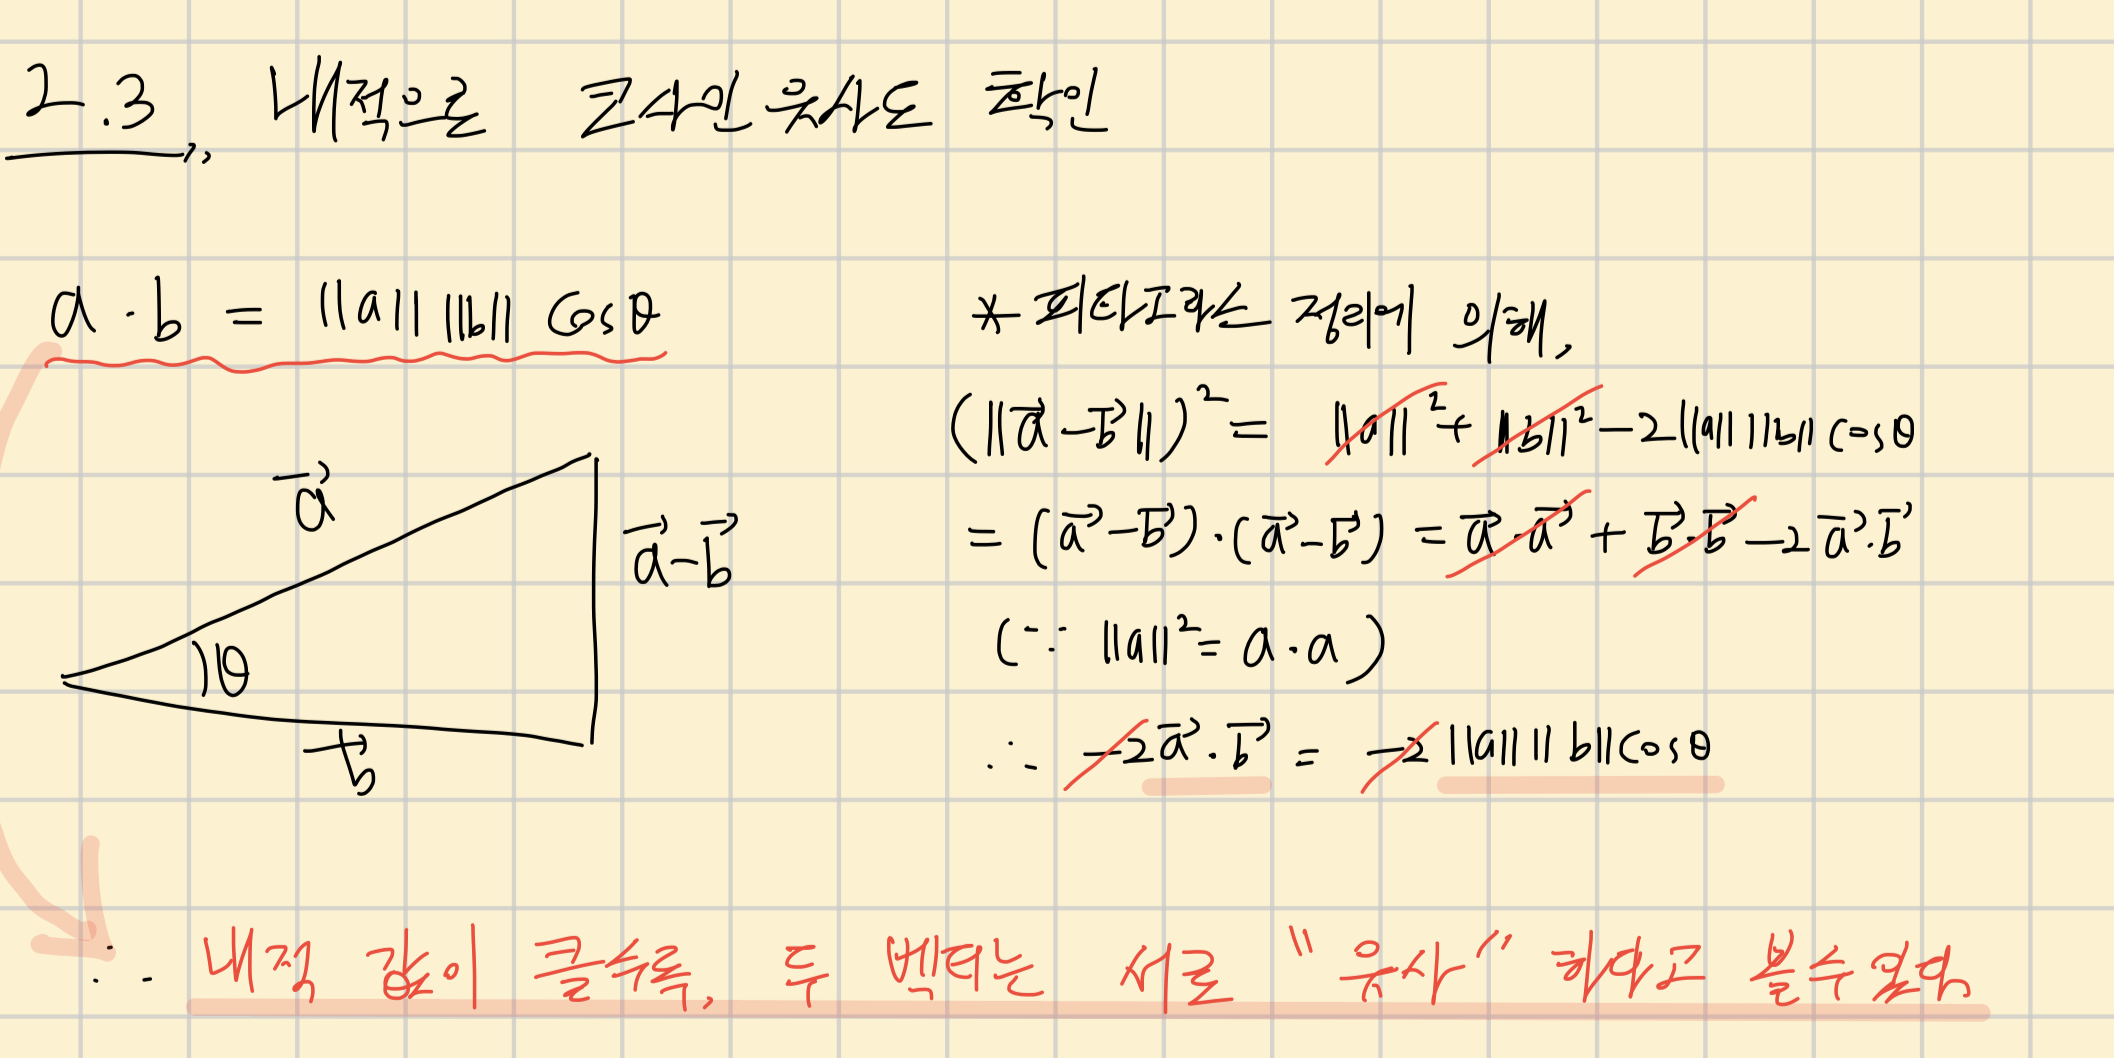

In [167]:
Image('/Users/kimjeongseob/Desktop/Math/2. MML_code/image_김도형 연습문제 풀이/IMG_DD121B697835-1.jpeg')

In [273]:
from sklearn.datasets import load_digits
X = load_digits().data
img = load_digits()

In [176]:
# 64 by 1 행벡터로 이미지 1,797개가 현재 X에 들어있음

X.shape

(1797, 64)

In [178]:
# (1) 내적을 이용하여 첫 번째 이미지와 10번째 이미지의 유사도를 구하라.

X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [179]:
X[9]

array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
       13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
       16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
        9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.])

In [180]:
X[0].T@X[9]

2807.0

In [190]:
# (2) 내적을 이용하여 모든 이미지의 조합에 대해 유사도를 구하라. 
# 어떻게 구현하는 것이 효율적일까? : X@X.T

simil = X@X.T
simil

array([[3070., 1866., 2264., ..., 2812., 3006., 2898.],
       [1866., 4209., 3432., ..., 3906., 3083., 3307.],
       [2264., 3432., 4388., ..., 4005., 3063., 3697.],
       ...,
       [2812., 3906., 4005., ..., 5092., 3729., 4598.],
       [3006., 3083., 3063., ..., 3729., 4316., 3850.],
       [2898., 3307., 3697., ..., 4598., 3850., 4938.]])

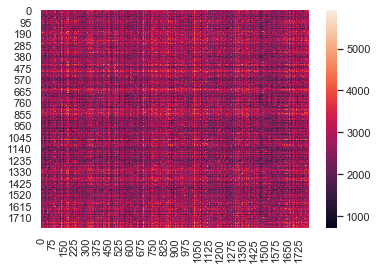

In [187]:
sns.heatmap(X@X.T)
plt.show()

In [215]:
# simil[0]의 내적값 탐색시작
# 만약 max값과 맞다면, 그때의 index출력 -> index+1 이미지가 가장 내적값이 높은 것

for i in range(len(simil[0])):
    if simil[0][i] == simil[0].max():
        print("{}번째 image가 가장 1번째 이미지와 코사인유사도가 높다.".format(i+1))

161번째 image가 가장 1번째 이미지와 코사인유사도가 높다.


In [293]:
# 실제 내적값이 높은 데이터 간 유사한가? 0 vs 8, 0 vs 1 의 내적값 비교를 통해 확인
# 만약, 내적 값에 따라 유사한지를 판단할 수 있으려면, 0 vs 8 내적값이 0 vs 1 내적값 보다는 커야할 것

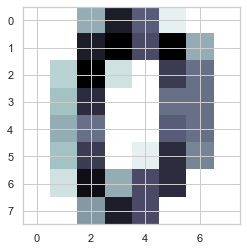

In [275]:
plt.imshow(img.images[0],cmap=plt.cm.bone_r)

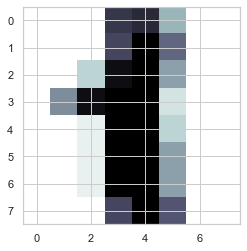

In [277]:
plt.imshow(img.images[1],cmap=plt.cm.bone_r)

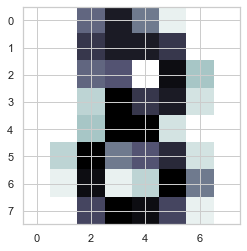

In [278]:
plt.imshow(img.images[8],cmap=plt.cm.bone_r)

In [283]:
_0 = img.images[0].reshape(64,-1)
_1 = img.images[1].reshape(64,-1)
_8 = img.images[8].reshape(64,-1)

In [292]:
_0.T@_1

array([[1866.]])

In [294]:
# 결과, 1보다는 8과의 0의 내적값이 큰 것으로 보아, 어느정도 내적값을 통한 코사인유사도 근사가 일단은 유의미하게는 보임

_0.T@_8

array([[2783.]])

In [304]:
# 실제 코사인 유사도 계산 결과, 0은 1보다는 8과 유사한 것을 확인할 수 있음

((_0.T@_1)/(np.linalg.norm(_0)*np.linalg.norm(_1)))[0][0]

0.5191023426414686

In [303]:
((_0.T@_8)/(np.linalg.norm(_0)*np.linalg.norm(_8)))[0][0]

0.7515122122359871

4. 벡터의 선형조합 : 두 이미지를 섞어놓는 morphing 효과 가능

    - olivetti faces data 활용 

In [217]:
from sklearn.datasets import fetch_olivetti_faces

In [227]:
img = fetch_olivetti_faces()

In [234]:
# 64 by 64 image로 400장 존재

img.images.shape

(400, 64, 64)

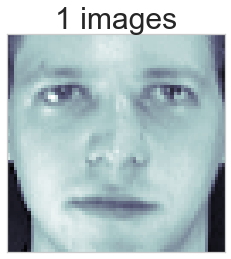

In [242]:
plt.imshow(img.images[0],cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([]);plt.yticks([])
plt.title("{} images".format(1),fontsize=30)
plt.show()

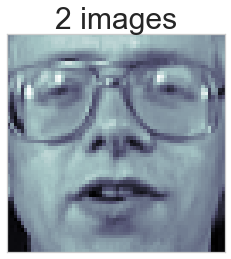

In [247]:
plt.imshow(img.images[10],cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([]);plt.yticks([])
plt.title("{} images".format(2),fontsize=30)
plt.show()

* morphing : 선형 조합을 통한 새로운 face image 조합
$$ 0.5image1 + 0.5image2$$

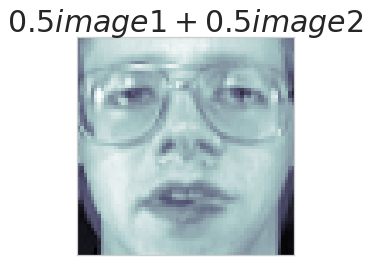

In [253]:
new_f = 0.5*img.images[0] + 0.5*img.images[10]
plt.imshow(new_f,cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([]);plt.yticks([])
plt.title("$ 0.5image1 + 0.5image2$",fontsize=30)
plt.show()

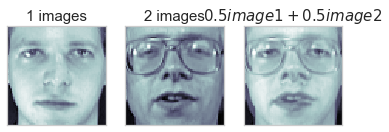

In [272]:
f, ax = plt.subplots(1,3)

ax[0].imshow(img.images[0],cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([]);ax[0].set_yticks([])
ax[0].set_title("1 images",fontsize=15)

ax[1].imshow(img.images[10],cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([]);ax[1].set_yticks([])
ax[1].set_title("2 images",fontsize=15)

new_f = 0.5*img.images[0] + 0.5*img.images[10]
ax[2].imshow(new_f,cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([]);ax[2].set_yticks([])
ax[2].set_title("$ 0.5image1 + 0.5image2$",fontsize=15)

plt.show()